In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indonesia-tourism-destination/user.csv
/kaggle/input/indonesia-tourism-destination/tourism_rating.csv
/kaggle/input/indonesia-tourism-destination/package_tourism.csv
/kaggle/input/indonesia-tourism-destination/tourism_with_id.csv


#### Dapatkan Path directory dataset

# Indonesia Tourism Recommendation [Content Based Filtering]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

#### Import library yang dibutuhkan

## Loading Dataset & Info

In [3]:
path_user = "/kaggle/input/indonesia-tourism-destination/user.csv"
user_df = pd.read_csv(path_user)
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [5]:
user_df.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


In [6]:
user_df.shape

(300, 3)

#### Load user dataframe & info

In [7]:
path_tourism_rating = "/kaggle/input/indonesia-tourism-destination/tourism_rating.csv"
tourism_rating_df = pd.read_csv(path_tourism_rating)
tourism_rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [8]:
tourism_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
tourism_rating_df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [10]:
tourism_rating_df.shape

(10000, 3)

#### Load tourism_rating dataframe & info

In [11]:
path_tourism_with_id = "/kaggle/input/indonesia-tourism-destination/tourism_with_id.csv"
tourism_with_id_df = pd.read_csv(path_tourism_with_id)
tourism_with_id_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [12]:
tourism_with_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [13]:
tourism_with_id_df.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [14]:
tourism_with_id_df.shape

(437, 13)

#### Load tourism_with_id dataframe & info

In [15]:
path_package_tourism = "/kaggle/input/indonesia-tourism-destination/package_tourism.csv"
package_tourism_df = pd.read_csv(path_package_tourism)
package_tourism_df.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [16]:
package_tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [17]:
package_tourism_df.describe()

,Package
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [18]:
package_tourism_df.shape

(100, 7)

#### Load package_tourism dataframe & info

## Preprocessing

In [19]:
tourism_with_id_df.head()
tourism_content_df = tourism_with_id_df
tourism_content_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


#### Lihat isi dari dataframe tourism_with_id


In [20]:
# Menggabungkan dataframe tourism_with_id dengan tourism_rating
tourism_all = np.concatenate((tourism_with_id_df.Place_Id.unique(),
                             tourism_rating_df.Place_Id.unique()))

# Mengurutkan data dan menghapus data yang sama
tourism_all = np.sort(np.unique(tourism_all))

print('Total number of tourism: ', len(tourism_all))

Total number of tourism:  437


### Hitung seluruh data tourism berdasarkan place id

In [21]:
all_rate_tourism = tourism_rating_df
all_rate_tourism

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


### Definisikan dataframe tourism_rating dengan variabel lain untuk digabungkan

In [22]:
# Menggabungkan dataframe rating dengan tourism_with_id berdasarkan nilai placeID
all_rate_tourism = pd.merge(all_rate_tourism, tourism_with_id_df[["Place_Id","Place_Name","Description","City","Category","Price"]],on='Place_Id', how='left')
all_rate_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0


#### Menggabungkan dataframe rating dengan tourism_with_id berdasarkan nilai placeID

In [23]:
all_rate_tourism['city_category'] = all_rate_tourism[['City','Category']].agg(' '.join,axis=1)
all_rate_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya


#### Buat atribut baru berupa gabungan city dan category

## Data Preperation

In [24]:
fix_tourism = all_rate_tourism.sort_values('Place_Id', ascending=True)
fix_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
6236,187,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,20000,Jakarta Budaya
5348,162,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,20000,Jakarta Budaya
5610,169,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,20000,Jakarta Budaya
2089,64,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,20000,Jakarta Budaya
5231,159,1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,20000,Jakarta Budaya
...,...,...,...,...,...,...,...,...,...
8710,263,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,10000,Surabaya Tempat Ibadah
6209,187,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,10000,Surabaya Tempat Ibadah
7082,213,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,10000,Surabaya Tempat Ibadah
6041,182,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,10000,Surabaya Tempat Ibadah


#### Urutkan berdasarkan Place_id secara ascending

In [25]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])
    

#### Buat function untuk check null

In [26]:
check_null(all_rate_tourism)

Tidak ditemukan missing value pada dataset


#### Lakukan pengecekan null

In [27]:
duplicates_all_columns = all_rate_tourism[all_rate_tourism.duplicated()]
len(duplicates_all_columns)

79

#### Cek data yang duplikat

In [28]:
all_rate_tourism = all_rate_tourism.drop_duplicates('Place_Id')

#### Drop data yang duplikat berdasarkan Place_Id

In [29]:
duplicates_all_columns = all_rate_tourism[all_rate_tourism.duplicated()]
len(duplicates_all_columns)

0

#### Cek kembali duplikasi data

In [30]:
all_rate_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya


In [31]:
id_place = all_rate_tourism.Place_Id.tolist()
name = all_rate_tourism.Place_Name.tolist()
description = all_rate_tourism.Description.tolist()
city = all_rate_tourism.City.tolist()
category = all_rate_tourism.Category.tolist()
city_category = all_rate_tourism.city_category.tolist()
price = all_rate_tourism.Price.tolist()

In [32]:
fix_tourism = pd.DataFrame({
    'id' : id_place,
    'name' : name,
    'description' : description,
    'city' : city,
    'category' : category,
    'city_category' : city_category,
    'price' : price,
})

fix_tourism.head()

,id,name,description,city,category,city_category,price
0,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya,75000
1,344,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari,3000
2,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan,94000
3,373,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya,10000
4,101,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya,0


#### Buat dataframe baru yang memuat data-data khusus terkait destinasi wisata

## Content Based Model Development

In [33]:
data_content_based = fix_tourism

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data city_category
tf.fit(data_content_based['city_category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'bahari', 'bandung', 'budaya', 'cagar', 'hiburan',
       'ibadah', 'jakarta', 'perbelanjaan', 'pusat', 'semarang',
       'surabaya', 'taman', 'tempat', 'yogyakarta'], dtype=object)

In [35]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_content_based['city_category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(437, 15)

In [36]:
#melihat tfidf matrix
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.69559204],
        [0.        , 0.72824058, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.5360408 , 0.        ,
         0.        ],
        ...,
        [0.        , 0.7724966 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.55900007, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57127819, 0.        ,
         0.58930677]])

In [37]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan city category
# Baris diisi dengan nama destinasi wisata

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_content_based.name
).sample(15, axis=1).sample(10, axis=0)

,budaya,semarang,tempat,bandung,yogyakarta,taman,surabaya,pusat,hiburan,ibadah,bahari,perbelanjaan,jakarta,cagar,alam
name,,,,,,,,,,,,,,,
Trans Studio Bandung,0.000000,0.000000,0.0,0.592025,0.000000,0.569871,0.0,0.0,0.569871,0.0,0.0,0.0,0.000000,0.000000,0.000000
Museum Macan (Modern and Contemporary Art in Nusantara),0.658813,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.752306,0.000000,0.000000
Wot Batu,0.000000,0.000000,0.0,0.551699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.589758,0.589758
Kota Tua,0.658813,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.752306,0.000000,0.000000
Taman Bunga Cihideung,0.000000,0.000000,0.0,0.551699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.589758,0.589758
Curug Dago,0.000000,0.000000,0.0,0.551699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.589758,0.589758
Taman Suropati,0.000000,0.000000,0.0,0.000000,0.000000,0.536041,0.0,0.0,0.536041,0.0,0.0,0.0,0.652166,0.000000,0.000000
Watu Gunung Ungaran,0.000000,0.663503,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.529039,0.529039
Observatorium Bosscha,0.000000,0.000000,0.0,0.551699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.589758,0.589758


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4099171 ],
       [0.        , 1.        , 0.        , ..., 0.56256337, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.41413775, 0.39938865,
        0.61245683],
       ...,
       [0.        , 0.56256337, 0.41413775, ..., 1.        , 0.38888769,
        0.        ],
       [0.        , 0.        , 0.39938865, ..., 0.38888769, 1.        ,
        0.        ],
       [0.4099171 , 0.        , 0.61245683, ..., 0.        , 0.        ,
        1.        ]])

In [39]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama destinasi wisata
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_content_based['name'], columns=data_content_based['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap tourism
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


name,Kyotoku Floating Market,Jakarta Aquarium dan Safari,Monumen Bambu Runcing Surabaya,Pantai Indrayanti,Museum Tengah Kebun
name,,,,,
Selasar Sunaryo Art Space,0.413308,0.610949,0.000000,0.000000,0.000000
Jembatan Merah,0.416500,0.000000,1.000000,0.000000,0.383247
Alun Alun Selatan Yogyakarta,0.000000,0.612457,0.000000,0.336966,0.000000
Pantai Indrayanti,0.000000,0.000000,0.000000,1.000000,0.000000
Tebing Breksi,0.514383,0.000000,0.417932,0.397740,0.473316
SnowBay Waterpark,0.000000,1.000000,0.000000,0.000000,0.490629
Curug Bugbrug,0.385155,0.000000,0.000000,0.000000,0.000000
Istana Negara Republik Indonesia,0.471694,0.490629,0.383247,0.000000,1.000000
Masjid Muhammad Cheng Hoo,0.000000,0.000000,0.389355,0.000000,0.000000


In [40]:
def tourism_recommendations(nama_wisata, similarity_data=cosine_sim_df, items=data_content_based[['name','description','city_category', 'price']], k=5):
    """
    Rekomendasi tourism berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_wisata : tipe data string (str)
                 nama_wisata (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan wisata sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_wisata].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_wisata agar nama_wisata yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_wisata, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

#### Membuat function tourism_recommendation

In [41]:
data_content_based[data_content_based.name.eq('Taman Legenda Keong Emas')]

,id,name,description,city,category,city_category,price
334,62,Taman Legenda Keong Emas,Taman Legenda Keong Emas merupakan salah satu ...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan,30000


In [42]:
tourism_recommendations('Taman Legenda Keong Emas')

,name,description,city_category,price
0,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta Taman Hiburan,25000
1,Taman Spathodea,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,Jakarta Taman Hiburan,0
2,Jakarta Aquarium dan Safari,"Jika telah mengunjungi Seaworld Ancol, mungkin...",Jakarta Taman Hiburan,185000
3,Kidzania,KidZania adalah sebuah waralaba swasta Meksiko...,Jakarta Taman Hiburan,185000
4,Sea World,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta Taman Hiburan,115000


#### Melakukan rekomendasi dengan function tourism_recommendation

#### Bisa dilihat rekomendasi wisat yang paling similiar dengan Taman Legenda keong emas adalah daftar diatas dan dari ke 5 hasil rekomendasi sesuai dengan city_category Taman Legenda Keong Emas sehingga accuracy 100 %

# Indonesia Tourism Recommendation [Collaborative Filtering]

In [43]:
data_collaborative = tourism_rating_df
data_collaborative.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## Data Preparation

In [44]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = data_collaborative['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

print()

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

print()

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [45]:
# Mengubah place_id menjadi list tanpa nilai yang sama
place_ids = data_collaborative['Place_Id'].unique().tolist()
print('list Place_Id: ', place_ids)

print()

# Melakukan encoding place_id
placeID_to_placeID_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', placeID_to_placeID_encoded)

print()

# Melakukan proses encoding angka ke ke user_id
placeID_encoded_to_placeID = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke Place_Id: ', placeID_encoded_to_placeID)

list Place_Id:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 1

In [46]:
# Mapping user_id ke dataframe tourism_rating
data_collaborative['user'] = data_collaborative['User_Id'].map(user_to_user_encoded)

# Mapping place_id ke dataframe tourism_rating
data_collaborative['tourism'] = data_collaborative['Place_Id'].map(placeID_to_placeID_encoded)
data_collaborative.head()

,User_Id,Place_Id,Place_Ratings,user,tourism
0,1,179,3,0,0
1,1,344,2,0,1
2,1,5,5,0,2
3,1,373,3,0,3
4,1,101,4,0,4


In [47]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah destinasi wisata
num_tourism = len(placeID_to_placeID_encoded)
print(num_tourism)

# Mengubah rating menjadi nilai float
data_collaborative['Place_Ratings'] = data_collaborative['Place_Ratings'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data_collaborative['Place_Ratings'])

# Nilai maksimal rating
max_rating = max(data_collaborative['Place_Ratings'])

print('Number of User: {}, Number of tourism: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_tourism, min_rating, max_rating
))

300
437
Number of User: 300, Number of tourism: 437, Min Rating: 1.0, Max Rating: 5.0


## Training Split

In [48]:
# Mengacak dataset
data_collaborative = data_collaborative.sample(frac=1, random_state=420)
data_collaborative

,User_Id,Place_Id,Place_Ratings,user,tourism
9535,287,17,5.0,286,56
5494,166,59,3.0,165,253
1038,33,388,2.0,32,394
9276,279,288,2.0,278,283
5928,179,381,4.0,178,121
...,...,...,...,...,...
266,10,168,5.0,9,196
1209,38,215,5.0,37,375
2675,83,374,2.0,82,318
4671,142,329,2.0,141,388


In [49]:
x = data_collaborative[['user', 'tourism']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data_collaborative['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_collaborative.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[286  56]
 [165 253]
 [ 32 394]
 ...
 [ 82 318]
 [141 388]
 [136  34]] [1.   0.5  0.25 ... 0.25 0.25 1.  ]


In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

class RecommenderNet(tf.keras.Model):

    # Insialisasi fungsi
    def __init__(self, num_users, num_tourism, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_tourism = num_tourism
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_dropout = layers.Dropout(0.3)
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.tourism_embedding = layers.Embedding( # layer embeddings tourism
            num_tourism,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.tourism_dropout = layers.Dropout(0.3)
        self.tourism_bias = layers.Embedding(num_tourism, 1) # layer embedding tourism bias

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_vector = self.user_dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        tourism_vector = self.tourism_embedding(inputs[:, 1]) # memanggil layer embedding 3
        tourism_vector = self.tourism_dropout(tourism_vector)
        tourism_bias = self.tourism_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_tourism = tf.tensordot(user_vector, tourism_vector, 2)

        x = dot_user_tourism + user_bias + tourism_bias

        return tf.nn.sigmoid(x) # activation sigmoid

In [51]:
model = RecommenderNet(num_users, num_tourism, 100) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [52]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6960 - root_mean_squared_error: 0.3458 - val_loss: 0.6963 - val_root_mean_squared_error: 0.3472
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6935 - root_mean_squared_error: 0.3403 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3469
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6921 - root_mean_squared_error: 0.3455 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3469
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6918 - root_mean_squared_error: 0.3452 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3468
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6901 - root_mean_squared_error: 0.3463 - val_loss: 0.6959 - val_root_mean_squared_error: 0.3470
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6879 - root_mean_squared_error: 0.3403 - val_loss: 0.6959 - val_root_mean_squared_error: 0.3470
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

## Evaluasi Metrik

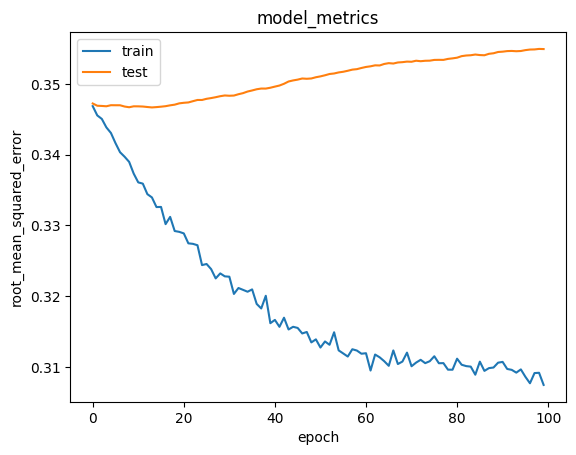

In [53]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Melakukan Rekomendasi Destinasi Wisata

In [54]:
df_tourism = fix_tourism
user_id = tourism_rating_df.User_Id.sample(1).iloc[0]
tourism_visited_by_user = tourism_rating_df[tourism_rating_df.User_Id == user_id]
tourism_visited_by_user

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
tourism_not_visited = df_tourism[~df_tourism['id'].isin(tourism_visited_by_user.Place_Id)]['id']
tourism_not_visited
tourism_not_visited = list(
    set(tourism_not_visited)
    .intersection(set(placeID_to_placeID_encoded.keys()))
)
tourism_not_visited = [[placeID_to_placeID_encoded.get(x)] for x in tourism_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_tourism_array = np.hstack(
    ([[user_encoder]] * len(tourism_not_visited), tourism_not_visited)
)

In [55]:
ratings = model.predict(user_tourism_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_tourism_ids = [
    placeID_encoded_to_placeID.get(tourism_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_tourism_user = (
    tourism_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

tourism_df_rows = df_tourism[df_tourism['id'].isin(top_tourism_user)]
tourism_df_rows
for row in tourism_df_rows.itertuples():
    print(row.name, ':', row.city_category)

print('----' * 8)
print('Top 10 tourism recommendation')
print('----' * 8)

recommended_tourism = df_tourism[df_tourism['id'].isin(recommended_tourism_ids)]
for row in recommended_tourism.itertuples():
    print(row.name, ':', row.city_category)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Showing recommendations for users: 182
Resto with high ratings from user
--------------------------------
De Mata Museum Jogja : Yogyakarta Budaya
Surabaya North Quay : Surabaya Taman Hiburan
Rabbit Town : Bandung Taman Hiburan
Kampung Batu Malakasari : Bandung Taman Hiburan
Tirto Argo Siwarak : Semarang Taman Hiburan
--------------------------------
Top 10 tourism recommendation
--------------------------------
Taman Sungai Mudal : Yogyakarta Cagar Alam
Panghegar Waterboom Bandung : Bandung Taman Hiburan
Monumen Yogya Kembali : Yogyakarta Budaya
Dago Dreampark : Bandung Taman Hiburan
Gua Belanda : Bandung Cagar Alam
Gunung Manglayang : Bandung Cagar Alam
Stone Garden Citatah : Bandung Taman Hiburan
Masjid Agung Trans Studio Bandung : Bandung Tempat Ibadah
Teras Cikapundung BBWS : Bandung Taman Hiburan
Bukit Moko : Bandung Cagar Alam
